# The performance of players NBA

## Import the libraries

In [2]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

# visualization
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.tree import DecisionTreeClassifier   # Arbre de décision
from sklearn.naive_bayes import GaussianNB      # Naive bayes
from sklearn.svm import SVC   # Support vector classifier
import pickle 
import flask

# **** les indicateurs pour valider un modèle
from sklearn.metrics import confusion_matrix     
from sklearn.metrics import recall_score

from sklearn.model_selection import GridSearchCV


## Using K-Fold Cross Validation

In [3]:
def score_classifier(dataset, classifier, labels):
    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """
# K-Fold Cross Validation randomly splits the training data into 3 subsets called folds
    kf = KFold(n_splits=3, random_state=50, shuffle=True, )  
    confusion_mat = np.zeros((2, 2))
    recall = 0
    for training_ids, test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        classifier.fit(training_set, training_labels)
        predicted_labels = classifier.predict(test_set)      
        confusion_mat += confusion_matrix(test_labels, predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
    recall /= 3

    print(confusion_mat)
    print(recall)    
    return classifier
    

## Getting the Data

In [4]:
df = pd.read_csv("nba_logreg.csv", sep=';')
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


## Data Exploration/Analysis

In [5]:
print(df.columns.values)  # Which features are available in the dataset?
df.describe()

['Name' 'GP' 'MIN' 'PTS' 'FGM' 'FGA' 'FG%' '3P Made' '3PA' '3P%' 'FTM'
 'FTA' 'FT%' 'OREB' 'DREB' 'REB' 'AST' 'STL' 'BLK' 'TOV' 'TARGET_5Yrs']


,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


### Let’s take a more detailed look at what data is actually missing

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

# we are just missing 11 values of 3P%


,Total,%
3P%,11,0.8
TARGET_5Yrs,0,0.0
GP,0,0.0
MIN,0,0.0
PTS,0,0.0


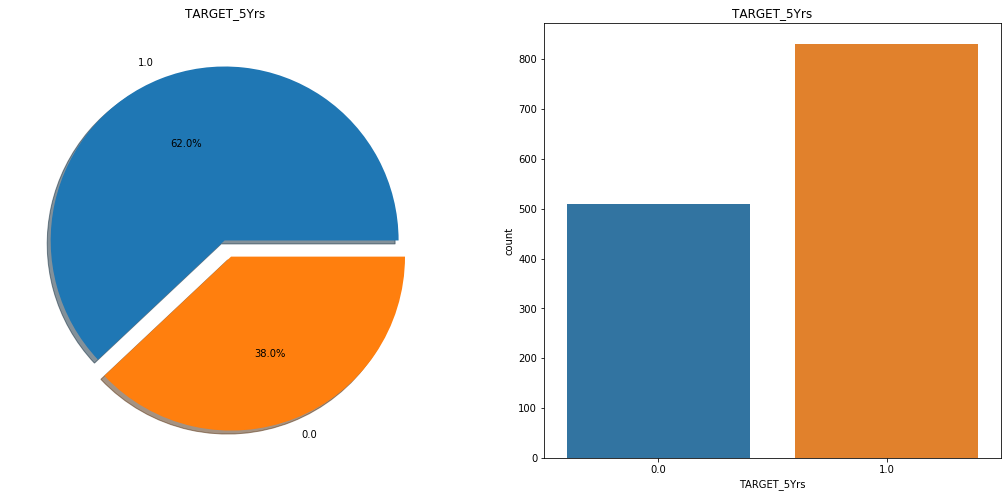

In [7]:

f,ax=plt.subplots(1,2,figsize=(18,8))
df['TARGET_5Yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('TARGET_5Yrs')
ax[0].set_ylabel('')
sns.countplot('TARGET_5Yrs',data=df,ax=ax[1])
ax[1].set_title('TARGET_5Yrs')
plt.show()

## Correlation Between The Features

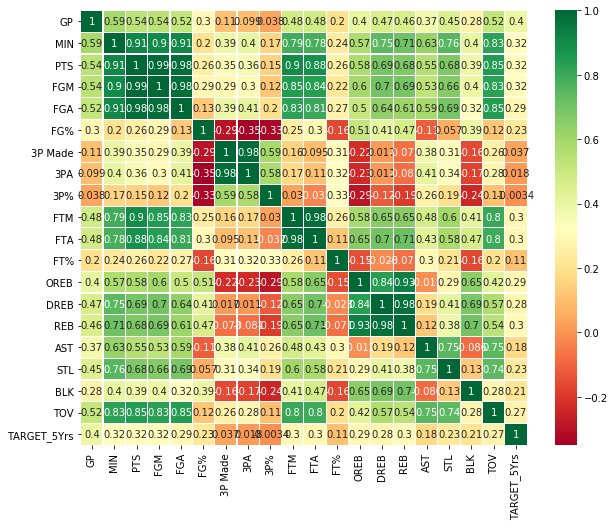

In [8]:
df2=df.drop(['Name'], axis=1)
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Data Preprocessing


In [9]:
# extract names, labels, features names and values
names = df['Name'].values.tolist() # players names
labels = df['TARGET_5Yrs'].values # labels
paramset = df.drop(['TARGET_5Yrs','Name'],axis=1).columns.values
df_vals = df.drop(['TARGET_5Yrs','Name','FG%','3P%','FT%'],axis=1).values 

### FG% is calculable from FGA and FGM, 3P% is calculable from 3PA and 3P Made also FT% is calculable from FTA and FTM so they can be eliminated in our dataframe so they have no influence on Target_5years, so the user does not need to enter these values.

### Missing Data

In [10]:
# replacing Nan values (only present when no 3 points attempts have been performed by a player)

for x in np.argwhere(np.isnan(df_vals)):
    df_vals[x]=0.0

In [11]:
# normalize dataset

S=MinMaxScaler()

X = S.fit_transform(df_vals)

pickle.dump(S,open('scaler.pkl','wb'))  # mémoriser le scaler 

## Model selection

##### Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.

In [18]:
#  TODO build a training set and choose a classifier which maximize recall score returned by the score_classifier function

# ****** SVC *********************************************************************************************
#model1=score_classifier(X,SVC(gamma='auto'),labels)
    #---->recall score = 0.820



[[266. 243.]
 [149. 682.]]
0.8204864735150789


In [14]:
# ****** RandomForestClassifier***************************************************************************
#model2=RFC_Classifier= score_classifier(X,RandomForestClassifier(n_estimators=10,random_state=1),labels)
    #----> recall score =0.7397

In [23]:
# ****** LogisticRegression ******************************************************************************

model=score_classifier(X,LogisticRegression(solver='lbfgs'),labels)
    #----> recall score = 0.825

[[271. 238.]
 [145. 686.]]
0.8254089862127097


In [14]:
# ****** Gaussian Naive Bayes ****************************************************************************
#model4=score_classifier(X,GaussianNB(),labels)
    #----> recall score = 0.5118

In [16]:
#****** Arbre de décision ********************************************************************************
#model5=score_classifier(X,DecisionTreeClassifier (),labels)
    #----> recall score = 0.6689

In [17]:

# ****** KNN *********************************************************************************************
#model6=score_classifier(X,KNeighborsClassifier (),labels)
    #----> recall score = 0.7787

## We can see that the racall score (=0.825) of the LogisticRegression model is better than the other models. so we will choose SVC as the model to treat  this problem.

## Parameter tuning for SVC

In [14]:
# Construction des dictionnaires d'hyperparamètres
# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)

# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'C': C_range, 'gamma': gamma_range}

# critère de sélection du meilleur modèle
score = 'roc_auc'

# initialiser une recherche sur grille
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring=score) # 5 folds dof cross validation

# faire tourner la recherche sur grille
grid.fit(X, labels)

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_, grid.best_score_))

The optimal parameters are {'C': 0.01, 'gamma': 0.01} with a score of 0.75


#### So we prefer to keep with the previous settings with a score of 0.85.

## Sauvegarder et Tester le modéle en local avec Pickle

In [24]:
pickle.dump(model,open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))


# print(model.predict([X[2]]))  


In [26]:
df1 = df.drop(['Name', 'TARGET_5Yrs','3P%','FG%','FT%'], axis=1)

coeff_df = pd.DataFrame(df1.columns.delete(15))

coeff_df.columns = ['Feature']

coeff_df["Correlation"] = pd.Series(model.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
0,GP,2.240179
9,OREB,1.241874
12,AST,0.867332
3,FGM,0.598383
2,PTS,0.594011
11,REB,0.579974
14,BLK,0.542090
7,FTM,0.531066
5,3P Made,0.322028
8,FTA,0.202224
